In [27]:
from google.colab import drive
drive.mount('/content/drive')


# get the images https://drive.google.com/open?id=1KALHmkW8Jt0cpqz6elvtbulEG_I_GZDJ
# get the csv 0,1 (up down) here : https://drive.google.com/open?id=1HGXKO6r6NY5nf7G9mja69NIR7NZSL9Ed

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**I know this needs to be tweaked, just the raw data eh! and a very little training and tweaking**

In [28]:
cd /

/


In [29]:
cd /content/drive/My\ Drive/'Colab Notebooks'/PONG/AI

/content/drive/My Drive/Colab Notebooks/PONG/AI


In [0]:
import keras
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
import cv2
import time

In [0]:
#!unzip images.zip

In [32]:
ls

 actions.csv                        'Pong_Thu May  2 20:16:17 2019.h5'
 images/                            'Pong_Thu May  2 20:17:40 2019.h5'
 images.zip                         'Pong_Thu May  2 20:19:15 2019.h5'
'Pong_Fri May  3 06:12:56 2019.h5'   sigmoid_cnn_pongai.ipynb
'Pong_Fri May  3 06:13:12 2019.h5'


In [33]:
from tqdm import tqdm

X = []
Y = []

with open ('actions.csv', 'r') as f:
    for line in f:
        Y.append(line.rstrip())


all_images = []
img_num = 0

#while tqdm(img_num < 30000): #3000 denotes the total no of input images
print("LOADING IMAGES! please wait...")


for img_num in tqdm(range(2000)):
  img = cv2.imread('images/frame_{0}.jpg'.format(img_num), cv2.IMREAD_GRAYSCALE)
  img = img[:, :, np.newaxis]
  all_images.append(img)
  img_num += 1
        

X = np.array(all_images)




  0%|          | 0/2000 [00:00<?, ?it/s]

  2%|▏         | 42/2000 [00:00<00:04, 416.19it/s]

LOADING IMAGES! please wait...




  4%|▍         | 81/2000 [00:00<00:04, 406.15it/s]

  6%|▌         | 122/2000 [00:00<00:04, 406.20it/s]

  8%|▊         | 162/2000 [00:00<00:04, 404.23it/s]

 10%|▉         | 198/2000 [00:00<00:04, 389.54it/s]

 12%|█▏        | 240/2000 [00:00<00:04, 396.37it/s]

 14%|█▍        | 279/2000 [00:00<00:04, 394.29it/s]

 16%|█▌        | 320/2000 [00:00<00:04, 396.21it/s]

 18%|█▊        | 359/2000 [00:00<00:04, 394.20it/s]

 20%|█▉        | 398/2000 [00:01<00:04, 391.63it/s]

 22%|██▏       | 440/2000 [00:01<00:03, 398.00it/s]

 24%|██▍       | 480/2000 [00:01<00:03, 398.43it/s]

 26%|██▌       | 521/2000 [00:01<00:03, 400.83it/s]

 28%|██▊       | 561/2000 [00:01<00:03, 399.42it/s]

 30%|███       | 601/2000 [00:01<00:03, 392.98it/s]

 32%|███▏      | 642/2000 [00:01<00:03, 397.13it/s]

 34%|███▍      | 682/2000 [00:01<00:03, 397.09it/s]

 36%|███▌      | 722/2000 [00:01<00:03, 396.75it/s]

 38%|███▊      | 762/2000 [00:01<00:03, 391.85it/s]

 40%|████      | 802/2000 [00:02<00:03, 377.2

In [24]:
MODEL_FIRST = 'Pong'
MODEL_END = time.asctime( time.localtime(time.time()))
MODEL_NAME = '{}_{}.h5'.format(MODEL_FIRST,MODEL_END)
#MODEL_NAME

# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.02, random_state=5)

# convert class vectors to binary class matricies for use in catagorical_crossentropy loss below
# number of action classifications
classifications = 3
y_train = keras.utils.to_categorical(y_train, classifications)
y_test = keras.utils.to_categorical(y_test, classifications)

#reference:-https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py
# CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('sigmoid'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

history = model.fit(x_train, y_train,
              batch_size=32,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)
#save weights post training

model.save(MODEL_NAME)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 1960 samples, validate on 40 samples
Epoch 1/10
1960/1960 [==============================] - 7s 3ms/step - loss: 0.7116 - acc: 0.5923 - val_loss: 0.5394 - val_acc: 0.7500
Epoch 2/10
1960/1960 [==============================] - 1s 475us/step - loss: 0.5818 - acc: 0.6760 - val_loss: 0.4856 - val_acc: 0.8250
Epoch 3/10
1960/1960 [==============================] - 1s 475us/step - loss: 0.5030 - acc: 0.7684 - val_loss: 0.3633 - val_acc: 0.8500
Epoch 4/10
1960/1960 [==============================] - 1s 473us/step - loss: 0.4564 - acc: 0.7954 - val_loss: 0.3468 - val_acc: 0.8750
Epoch 5/10
1960/1960 [==============================] - 1s 469us/step - loss: 0.4303 - acc: 0.8184 - val_loss: 0.3505 - val_acc: 0.8500
Epoch 6/10
1960/1960 [===================

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


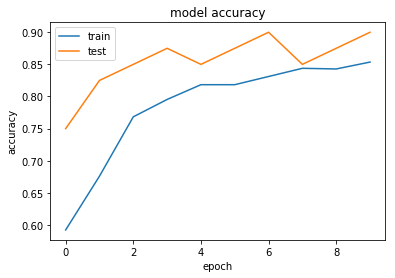

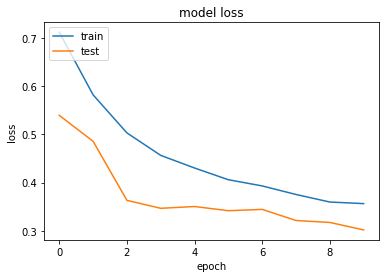

In [25]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#resnet , vgg-16

In [35]:

from keras import optimizers


MODEL_FIRST = 'Pong'
MODEL_END = time.asctime( time.localtime(time.time()))
MODEL_NAME = '{}_{}.h5'.format(MODEL_FIRST,MODEL_END)
#MODEL_NAME

# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=5)

# convert class vectors to binary class matricies for use in catagorical_crossentropy loss below
# number of action classifications
classifications = 3
y_train = keras.utils.to_categorical(y_train, classifications)
y_test = keras.utils.to_categorical(y_test, classifications)

#reference:-https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py
# CNN model

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('sigmoid'))

# initiate RMSprop optimizer
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Let's train the model using RMSprop
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

history = model.fit(x_train, y_train,
              batch_size=8,
              epochs=30,
              validation_data=(x_test, y_test),
              shuffle=True)
#save weights post training

model.save(MODEL_NAME)

Train on 1600 samples, validate on 400 samples
Epoch 1/30
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1821 - acc: 0.4944 - val_loss: 0.1677 - val_acc: 0.5125
Epoch 2/30
1600/1600 [==============================] - 1s 900us/step - loss: 0.1701 - acc: 0.4938 - val_loss: 0.1676 - val_acc: 0.5125
Epoch 3/30
1600/1600 [==============================] - 1s 902us/step - loss: 0.1677 - acc: 0.5162 - val_loss: 0.1632 - val_acc: 0.4875
Epoch 4/30
1600/1600 [==============================] - 1s 910us/step - loss: 0.1587 - acc: 0.6019 - val_loss: 0.1338 - val_acc: 0.7100
Epoch 5/30
1600/1600 [==============================] - 1s 896us/step - loss: 0.1470 - acc: 0.6644 - val_loss: 0.1236 - val_acc: 0.7325
Epoch 6/30
1600/1600 [==============================] - 1s 923us/step - loss: 0.1425 - acc: 0.6606 - val_loss: 0.1184 - val_acc: 0.7475
Epoch 7/30
1600/1600 [==============================] - 1s 904us/step - loss: 0.1338 - acc: 0.6950 - val_loss: 0.1048 - val_acc: 0.8125
Epo

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


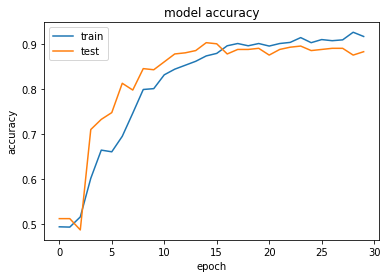

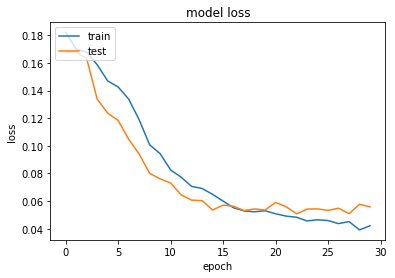

In [36]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#resnet , vgg-16

In [37]:
print(MODEL_NAME)

Pong_Fri May  3 06:17:50 2019.h5
